This notebook illustrates how we transform ANN 2 from Keras into pytorch.

In [1]:
import tensorflow as tf
from cbrain import *
import torch as to
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda,Dropout
from cbrain.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import xarray as xr

import tensorflow.keras as ke


from cbrain.imports import *

from cbrain.utils import *

from cbrain.cam_constants import *

from cbrain.data_generator import DataGenerator
import pandas as ps

2023-06-29 13:30:00.060918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#define some hyperparameters 

original_dim_input=109  # CBRAIN input node size

original_dim_output=int(112) # CBRAIN output node size 


input_shape = (original_dim_input,)
out_shape=(original_dim_output,)
intermediate_dim = 455

batch_size= 9402





In [3]:
#load the ANN2 in keras 
ANN_2=ke.models.load_model('real_geography/ANNs/ANNs_lin/ANN_2/ANN_2_CRM_lin_model.h5')
ANN_2.summary()
ANN_2_weights=ANN_2.get_weights()

batch_size= 9402


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 109)]             0         
                                                                 
 dense (Dense)               (None, 455)               50050     
                                                                 
 dense_1 (Dense)             (None, 455)               207480    
                                                                 
 dense_2 (Dense)             (None, 455)               207480    
                                                                 
 dense_3 (Dense)             (None, 455)               207480    
                                                                 
 dense_4 (Dense)             (None, 455)               207480    
                                                                 
 dense_5 (Dense)             (None, 455)               207480  

2023-06-29 13:30:32.408884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


import pytorch 

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
#build ANN 2 in pytorch 

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.X_1=nn.Linear(109,455)
        self.X_2=nn.Linear(455,455)
        self.X_3=nn.Linear(455,455)
        self.X_4=nn.Linear(455,455)
        self.X_5=nn.Linear(455,455)
        self.X_6=nn.Linear(455,455)
        self.X_7=nn.Linear(455,112)
        self.X_8=nn.Linear(112,112)

    def forward(self,x):
        x=F.elu_(self.X_1(x))
        x=F.elu_(self.X_2(x))
        x=F.elu_(self.X_3(x))
        x=F.elu_(self.X_4(x))
        x=F.elu_(self.X_5(x))
        x=F.elu_(self.X_6(x))
        x=F.elu_(self.X_7(x))
        x=self.X_8(x)

        
        return x
    
    
        



        


In [7]:
# initialize ANN 2 in torch
ANN_2_torch=ANN()
print(ANN_2_torch)

ANN(
  (X_1): Linear(in_features=109, out_features=455, bias=True)
  (X_2): Linear(in_features=455, out_features=455, bias=True)
  (X_3): Linear(in_features=455, out_features=455, bias=True)
  (X_4): Linear(in_features=455, out_features=455, bias=True)
  (X_5): Linear(in_features=455, out_features=455, bias=True)
  (X_6): Linear(in_features=455, out_features=455, bias=True)
  (X_7): Linear(in_features=455, out_features=112, bias=True)
  (X_8): Linear(in_features=112, out_features=112, bias=True)
)


In [8]:
#load weights and bias from keras into pytorch model 
ANN_2_torch.X_1.weight.data=to.from_numpy(np.transpose(ANN_2_weights[0]))
ANN_2_torch.X_1.bias.data=to.from_numpy(np.transpose(ANN_2_weights[1]))
ANN_2_torch.X_2.weight.data=to.from_numpy(np.transpose(ANN_2_weights[2]))
ANN_2_torch.X_2.bias.data=to.from_numpy(np.transpose(ANN_2_weights[3]))
ANN_2_torch.X_3.weight.data=to.from_numpy(np.transpose(ANN_2_weights[4]))
ANN_2_torch.X_3.bias.data=to.from_numpy(np.transpose(ANN_2_weights[5]))
ANN_2_torch.X_4.weight.data=to.from_numpy(np.transpose(ANN_2_weights[6]))
ANN_2_torch.X_4.bias.data=to.from_numpy(np.transpose(ANN_2_weights[7]))
ANN_2_torch.X_5.weight.data=to.from_numpy(np.transpose(ANN_2_weights[8]))
ANN_2_torch.X_5.bias.data=to.from_numpy(np.transpose(ANN_2_weights[9]))
ANN_2_torch.X_6.weight.data=to.from_numpy(np.transpose(ANN_2_weights[10]))
ANN_2_torch.X_6.bias.data=to.from_numpy(np.transpose(ANN_2_weights[11]))
ANN_2_torch.X_7.weight.data=to.from_numpy(np.transpose(ANN_2_weights[12]))
ANN_2_torch.X_7.bias.data=to.from_numpy(np.transpose(ANN_2_weights[13]))
ANN_2_torch.X_8.weight.data=to.from_numpy(np.transpose(ANN_2_weights[14]))
ANN_2_torch.X_8.bias.data=to.from_numpy(np.transpose(ANN_2_weights[15]))


In [9]:
# define input and output variables 
in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECTt-dt','CLDLIQBP','CLDICEBP']
out_vars = ['QBCTEND','TBCTEND','CLDLIQBCTEND','CLDICEBCTEND','PREC_CRM_SNOW','PREC_CRM',
            'NN2L_FLWDS','NN2L_DOWN_SW','NN2L_SOLL','NN2L_SOLLD','NN2L_SOLS','NN2L_SOLSD']

#loading the output normalization scalars for SP variables ( stds over 2 months of SP simulation)

scale_array=ps.read_csv('nn_config/scale_dicts/real_geography_SP_vars_updt.csv')


QBC_std_surf=scale_array.QBCTEND_std.values[-1]

TBC_std=scale_array.TBCTEND_std.values[-1]
CLDLIQBCTEND_std=scale_array.CLDLIQBCTEND_std.values[-1]
CLDICEBCTEND_std=scale_array.CLDICEBCTEND_std.values[-1]


PREC_CRM_SNOW_std=scale_array.PRECT_CRM_SNOW_std.values
PREC_CRM_std=scale_array.PRECT_CRM_std.values

NN2L_FLWDS_std=scale_array.NN2L_FLWDS_std.values
NN2L_DOWN_SW_std=scale_array.NN2L_DOWN_SW_std.values
NN2L_SOLL_std=scale_array.NN2L_SOLL_std.values
NN2L_SOLLD_std=scale_array.NN2L_SOLLD_std.values
NN2L_SOLS_std=scale_array.NN2L_SOLS_mean_std.values
NN2L_SOLSD_std=scale_array.NN2L_SOLSD_mean_std.values





# defining the scaling dict for the ANN training 

scale_dict_II = {
    'QBCTEND': 1/QBC_std_surf, 
    'TBCTEND': 1/TBC_std, 
    'CLDICEBCTEND': 1/CLDICEBCTEND_std, 
    'CLDLIQBCTEND': 1/CLDLIQBCTEND_std, 
    'NN2L_FLWDS':1/NN2L_FLWDS_std,
    'NN2L_DOWN_SW':1/NN2L_DOWN_SW_std,
    'NN2L_SOLL':1/NN2L_SOLL_std,
    'NN2L_SOLLD':1/NN2L_SOLLD_std,
    'NN2L_SOLS':1/NN2L_SOLS_std,
    'NN2L_SOLSD':1/NN2L_SOLSD_std,    
    'PREC_CRM': 1/PREC_CRM_std,
    'PREC_CRM_SNOW': 1/PREC_CRM_SNOW_std
}





# transform vertical coord into pressure levels 

from cbrain.data_generator import DataGenerator

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


# load test data set 

val_gen_II = DataGenerator(
    data_fn = '../SPCESM_data/2015_test_7_consec_days_mem.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../SPCESM_data/2013_norm_7_consec_days_mem.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=int(96*144),
    shuffle=True
)

In [10]:
from cbrain.save_weights import save_norm

In [40]:
# predict with the keras model and pytorch

In [11]:
pred_keras= ANN_2.predict(val_gen_II[300][0])

432/432 [==============================] - 1s 1ms/step


In [12]:
print(pred_keras.shape)
pred_keras

(13824, 112)


array([[-5.9805676e-15, -4.5041553e-15, -6.7605426e-15, ...,
         4.5845234e-01,  1.8146679e+00,  9.3443292e-01],
       [-5.9503184e-15, -4.4813328e-15, -6.7261734e-15, ...,
         4.5930886e-01,  1.8144661e+00,  9.3492311e-01],
       [-5.9514026e-15, -4.4820918e-15, -6.7270408e-15, ...,
         4.5928830e-01,  1.8144729e+00,  9.3491048e-01],
       ...,
       [-3.5815535e-15, -2.6779794e-15, -4.0390868e-15, ...,
         3.4460751e-03, -1.1263207e-02, -2.4831742e-02],
       [-3.5844808e-15, -2.6800394e-15, -4.0425562e-15, ...,
         3.4492118e-03, -1.1260502e-02, -2.4827786e-02],
       [-3.5524968e-15, -2.6561327e-15, -4.0063439e-15, ...,
         3.4776432e-03, -1.1293836e-02, -2.4800368e-02]], dtype=float32)

In [13]:
pred_pytorch=ANN_2_torch(to.from_numpy(val_gen_II[300][0]))

In [14]:
pred_pytorch

tensor([[-5.9806e-15, -4.5040e-15, -6.7605e-15,  ...,  4.5845e-01,
          1.8147e+00,  9.3443e-01],
        [-5.9505e-15, -4.4814e-15, -6.7261e-15,  ...,  4.5931e-01,
          1.8145e+00,  9.3492e-01],
        [-5.9514e-15, -4.4821e-15, -6.7271e-15,  ...,  4.5929e-01,
          1.8145e+00,  9.3491e-01],
        ...,
        [-3.5817e-15, -2.6781e-15, -4.0392e-15,  ...,  3.4461e-03,
         -1.1263e-02, -2.4832e-02],
        [-3.5846e-15, -2.6803e-15, -4.0421e-15,  ...,  3.4489e-03,
         -1.1261e-02, -2.4828e-02],
        [-3.5525e-15, -2.6562e-15, -4.0062e-15,  ...,  3.4774e-03,
         -1.1294e-02, -2.4801e-02]], grad_fn=<AddmmBackward0>)

In [15]:
# perform a forward step with pytorch to get weights and biases of ANN 2 
module = to.jit.trace(ANN_2_torch.forward, to.from_numpy(val_gen_II[300][0]))

In [16]:
# the same forward step but enire ANN 2 is saved 
mod = to.jit.trace(ANN_2_torch, to.from_numpy(val_gen_II[300][0]))

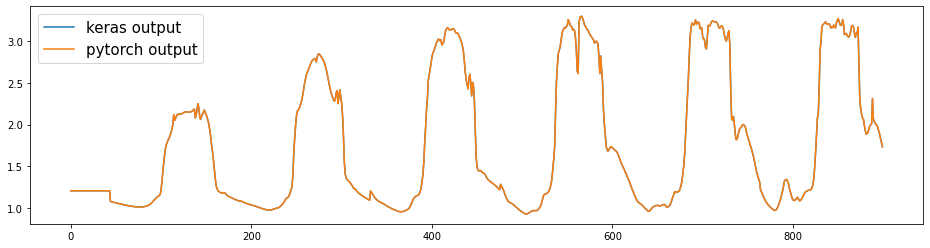

In [17]:
# compares results 
plt.figure(1,(16,4))
plt.plot(pred_keras[100:1000,106],label='keras output')
plt.plot(pred_pytorch.detach().numpy()[100:1000,106],label='pytorch output')
plt.legend(fontsize=15)

In [18]:
a=np.isclose(pred_keras,pred_pytorch.detach().numpy(),atol=2E-6)

In [19]:
a.shape

(13824, 112)

In [20]:
np.where(a==False)[0].size

251

In [21]:
np.where(a==True)[0].size

1548037

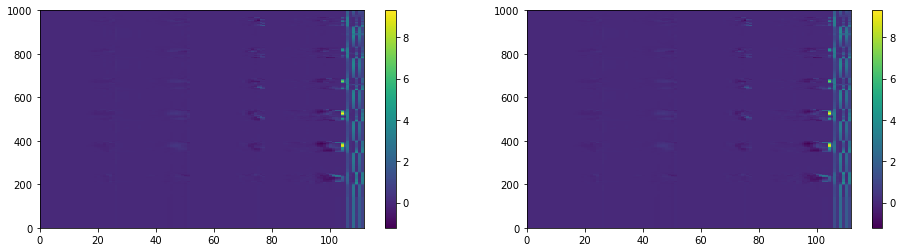

In [22]:
plt.figure(1,(16,4))
plt.subplot(1,2,1)
plt.pcolor(pred_keras[0:1000])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(pred_pytorch.detach().numpy()[0:1000])
plt.colorbar()

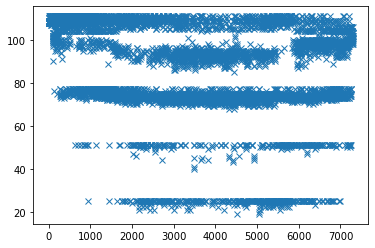

In [23]:
plt.plot(np.where(pred_keras-pred_pytorch.detach().numpy()>=1E-6)[1],'x')#np.max(pred_keras-pred_pytorch.detach().numpy()))

In [25]:
# save weights and biases of torch model 
to.save(ANN_2_torch,'real_geography/ANNs/ANN_2/ANN_2_CRM_lin.pt')

In [26]:
# save entire ANN 2 in pytorch 
to.jit.save(mod,'real_geography/ANNs/ANN_2/ANN_2_CRM_lin_jit.pt')